# Access RAR-compressed files from Zenodo using the preload method

This notebook shows an example how to preload RAR-compressed files published on the [https://zenodo.org](https://zenodo.org) webpage. The compressed files will be downloaded, unpacked and stored in the cache data store, which can be subsequently used by the data store as usual. 

### Setup
In order to run this notebook, you need to install [`xcube_zenodo`](https://github.com/xcube-dev/xcube-zenodo), following the [README](../README.md).

Note that [`xcube_zenodo`](https://github.com/xcube-dev/xcube-zenodo) is a plugin of [`xcube`](https://xcube.readthedocs.io/en/latest/), where `xcube` is included in the `environment.yml`.  

Now, we first import everything we need:

In [1]:
from xcube.core.store import new_data_store

In [2]:
%%time
store = new_data_store("zenodo", root="12698637")

CPU times: user 43.6 ms, sys: 11.9 ms, total: 55.5 ms
Wall time: 81 ms


We can list the data IDs, which already tell us that we need to preload the data, since the available files in the records are all zip files. If the user tries to use `open_data()` to access a compressed data source, the store will raise an error and notify the user that `preload_data()` may be used.  

In [3]:
%%time
store.list_data_ids()

CPU times: user 7.49 ms, sys: 169 μs, total: 7.66 ms
Wall time: 218 ms


['2001-2005_HDF.rar',
 '2021-2023_TIFF.rar',
 '2006-2010_TIFF.rar',
 '2016-2020_TIFF.rar',
 '2016-2020_HDF.rar',
 '2011-2015_TIFF.rar',
 '2011-2015_HDF.rar',
 '2006-2010_HDF.rar',
 '2001-2005_TIFF.rar',
 '1991-2000_TIFF.rar',
 '1991-2000_HDF.rar',
 '1981-1990_TIFF.rar',
 '1981-1990_HDF.rar',
 '2021-2023_HDF.rar']

Compressed files can be preloaded using the `preload_data` method. This approach enables the downloading of compressed files that cannot be lazily loaded, allowing them to be stored and readily available for the duration of the project. Also this method uses `preload_params`, which can be viewed in the next cell.

In [4]:
%%time
preload_params = store.get_preload_data_params_schema()
preload_params

CPU times: user 67 μs, sys: 7 μs, total: 74 μs
Wall time: 78 μs


The `preload_data` method returns a store which may be used subsequently to access the preloaded data, as shown in the subsequent cells. If no data IDs are given, all available data in compressed format will be preloaded. Note that the `preload_method` is new and highly experimental. 

In [5]:
cache_store = store.preload_data("2021-2023_TIFF.rar")

Data ID,Status,Progress,Message,Exception
2021-2023_TIFF.rar,COMPLETED,100%,Preload finished,-


The data IDs can be view by listing the data IDs of the cache store, which is returned by the `preload_data` method. Note that in this example the compressed file contains multiple files. Each file is written to a Zarr file and the data ID is extended by the individual file names where the file extension is adjusted. 

In [6]:
cache_store.list_data_ids()

['2021-2023_TIFF/GlobMapLAIV3.A2021169.Global.LAI.tif',
 '2021-2023_TIFF/GlobMapLAIV3.A2023249.Global.LAI.tif',
 '2021-2023_TIFF/GlobMapLAIV3.A2021121.Global.LAI.tif',
 '2021-2023_TIFF/GlobMapLAIV3.A2022025.Global.LAI.tif',
 '2021-2023_TIFF/GlobMapLAIV3.A2021161.Global.LAI.tif',
 '2021-2023_TIFF/GlobMapLAIV3.A2023289.Global.LAI.tif',
 '2021-2023_TIFF/GlobMapLAIV3.A2021305.Global.LAI.tif',
 '2021-2023_TIFF/GlobMapLAIV3.A2021105.Global.LAI.tif',
 '2021-2023_TIFF/GlobMapLAIV3.A2023001.Global.LAI.tif',
 '2021-2023_TIFF/GlobMapLAIV3.A2022049.Global.LAI.tif',
 '2021-2023_TIFF/GlobMapLAIV3.A2022233.Global.LAI.tif',
 '2021-2023_TIFF/GlobMapLAIV3.A2022161.Global.LAI.tif',
 '2021-2023_TIFF/GlobMapLAIV3.A2022009.Global.LAI.tif',
 '2021-2023_TIFF/GlobMapLAIV3.A2023225.Global.LAI.tif',
 '2021-2023_TIFF/GlobMapLAIV3.A2023281.Global.LAI.tif',
 '2021-2023_TIFF/GlobMapLAIV3.A2022201.Global.LAI.tif',
 '2021-2023_TIFF/GlobMapLAIV3.A2022241.Global.LAI.tif',
 '2021-2023_TIFF/GlobMapLAIV3.A2022265.Global.LA

Next we want to open one of the datasets. We first view the availbale parameters to open the data. 

In [7]:
%%time
open_params = cache_store.get_open_data_params_schema(data_id="2021-2023_TIFF/GlobMapLAIV3.A2021169.Global.LAI.tif")
open_params

CPU times: user 162 μs, sys: 210 μs, total: 372 μs
Wall time: 376 μs


In [8]:
%%time
ds = cache_store.open_data(
    "2021-2023_TIFF/GlobMapLAIV3.A2021169.Global.LAI.tif",
    data_type="dataset",
)
ds

CPU times: user 25.9 ms, sys: 3.66 ms, total: 29.6 ms
Wall time: 64.8 ms


<xarray.Dataset> Size: 21MB
Dimensions:      (x: 4950, y: 2091)
Coordinates:
  * x            (x) float64 40kB -180.0 -179.9 -179.8 ... 179.8 179.9 180.0
  * y            (y) float64 17kB 89.19 89.11 89.04 ... -62.67 -62.74 -62.81
    spatial_ref  int64 8B 0
Data variables:
    band_1       (y, x) int16 21MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
Attributes:
    TIFFTAG_SOFTWARE:  MODISSoft
    AREA_OR_POINT:     Area

We plot parts of the opened data as an example below.

CPU times: user 1.02 s, sys: 505 ms, total: 1.53 s
Wall time: 1.62 s


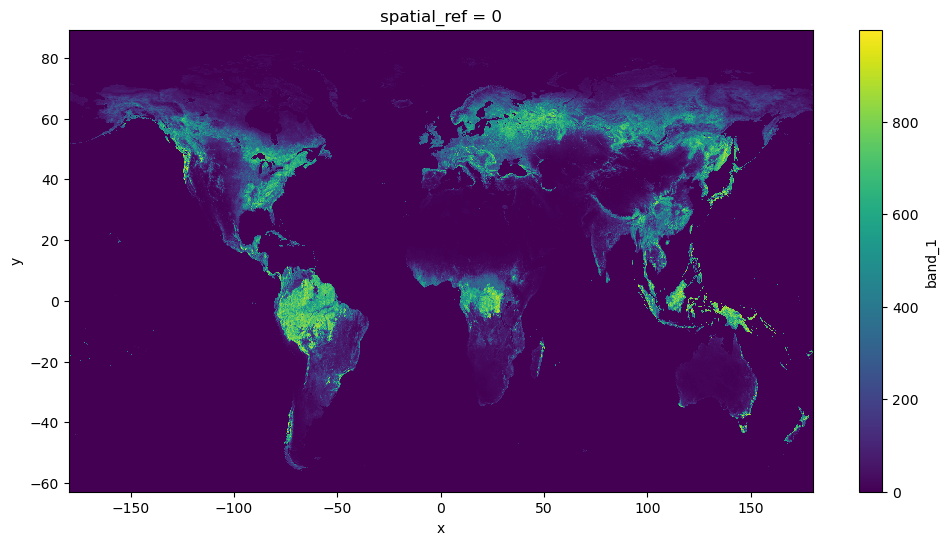

In [9]:
%%time
ds.band_1.plot(figsize=(12, 6))